<a href="https://colab.research.google.com/github/JonathanSum/Deep-Projects/blob/master/sky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://imgur.com/wniZTh0.jpg" width=300>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive.flush_and_unmount()

In [0]:
!curl https://course.fast.ai/setup/colab | bash
from fastai.vision import *

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1634      0 --:--:-- --:--:-- --:--:--  1634
Updating fastai...
Done.


In [0]:
!cp "/content/drive/My Drive/Happy Sugar Life From Above/train.tar" "/content" 


In [0]:
rm -r /content/train

In [0]:
!tar -xvf "/content/train.tar" 
# !tar -xvf "/content/drive/My Drive/Happy Sugar Life From Above/test.tar" 

In [0]:
!git clone 'https://github.com/DIUx-xView/xview2-baseline.git' xview2

Cloning into 'xview2'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 136 (delta 1), reused 4 (delta 1), pack-reused 128
Receiving objects: 100% (136/136), 89.50 KiB | 5.97 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [0]:
!pip install -r /content/xview2/requirements.txt

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [0]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM

print(f"using , have {free}MB of GPU RAM free")

using , have 16270MB of GPU RAM free


In [0]:
folder = 'sato'
path = Path('data/happy_sugar_life')
dest = path/folder
path.mkdir(parents=True, exist_ok=True)
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
!rm -r /content/train

In [0]:
!python /content/mask_upload.py --base-dir /content/train --output-dir /content/data/happy_sugar_life/ouputs

In [0]:
#!python /content/xview2/utils/mask_polygons.py --input /content/XBD --single-file --border 2

In [0]:
!mv /content/train/images /content/data/happy_sugar_life
!mv /content/data/happy_sugar_life/ouputs /content/data/happy_sugar_life/labels

mv: cannot stat '/content/train/images': No such file or directory


In [0]:
path_lbl = path/'labels'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
print(len(fnames))
print(len(get_image_files(path_lbl)))

5598
5598


In [0]:
fnames[:15]

In [0]:
fnames2 = get_image_files(path_lbl)
fnames2[:15]

In [0]:
!/content/xview2/utils/inference.sh -x

In [0]:
#!/content/xview2/utils/data_finalize.sh -i /content/XBD -x /content/ -s .75

In [0]:
#!/content/xview2/utils/mask_polygons.py --help

In [0]:
#!python /content/xview2/utils/inference_image_output.py --input /content/XBD/guatemala-volcano/labels/guatemala-volcano_00000000_post_disaster.json --output /content/output

In [0]:
# python mask.py --base-dir "C:\Users\The Shape of Voice\.fastai\Sky\train_test\images" --output-dir "out_test"

# !python mask.py --base-dir /content/XBD/guatemala-volcano --output-dir /content/output


In [0]:
!rm -r /content/data/what


PosixPath('data/happy_sugar_life/images/hurricane-michael_00000092_post_disaster.png')

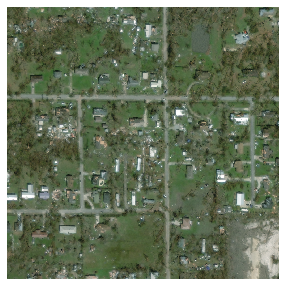

In [0]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))
img_f

In [0]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/happy_sugar_life/images/hurricane-michael_00000092_post_disaster.png'),
 PosixPath('data/happy_sugar_life/images/palu-tsunami_00000154_pre_disaster.png'),
 PosixPath('data/happy_sugar_life/images/midwest-flooding_00000159_pre_disaster.png')]

In [0]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

In [0]:
get_y_fn(img_f)

PosixPath('data/happy_sugar_life/labels/hurricane-harvey_00000206_pre_disaster_masked_dmg_masked_dmg.png')

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}' 

In [0]:
#socal-fire_00000272_post_disaster_masked_dmg.png'
#socal-fire_00000002_post_disaster.png
path2 = Path('data/happy_sugar_life/labels/data/happy_sugar_life/images/hurricane-harvey_00000060_post_disaster.png')
path2

In [0]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)
img_f

FileNotFoundError: ignored

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes



array(['un-classified', 'no-damage', 'minor-damage', 'major-damage', 'destroyed'], dtype='<U13')

In [0]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 16270MB of GPU RAM free


In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.2)
       .label_from_func(get_y_fn, classes=codes))
#so in order to run fast, we have to use codes(numbers) for the class
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
data = (src.transform(tfms, size=size, tfm_y=True)           #using transforms to resize
        .databunch(bs=bs)
        .normalize(imagenet_stats))


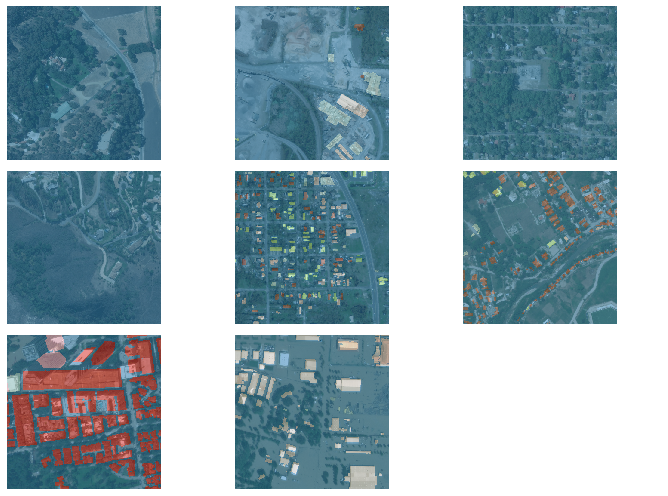

In [0]:
data.show_batch(rows=3, figsize=(10,7))

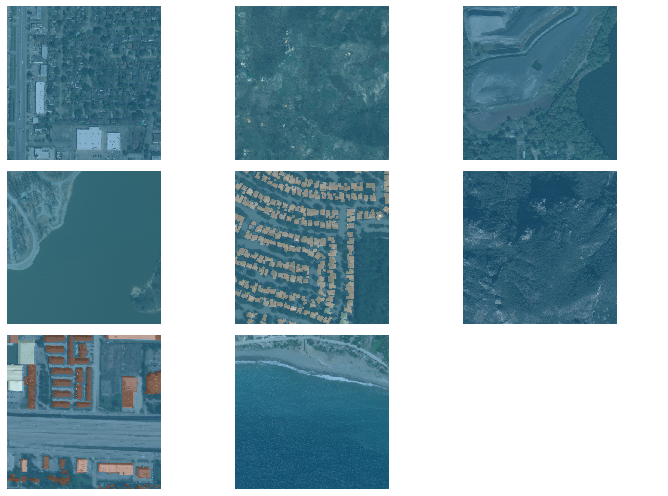

In [0]:
data.show_batch(3, figsize=(10,7), ds_type=DatasetType.Valid)

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['un-classified']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
void_code

0

In [0]:
metrics=acc_camvid
wd=1e-2
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 16270MB of GPU RAM free


In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [0]:
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,acc_camvid,time


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File "/usr/lib/python

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [0]:
lr=1e-3

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)


epoch,train_loss,valid_loss,acc_camvid,time
0,0.125754,0.101192,nan,08:44
1,0.112324,0.101577,nan,08:40
2,0.121234,0.091984,nan,08:40
3,0.105628,0.092427,nan,08:39
4,0.102182,0.089735,nan,08:39
5,0.091708,0.092145,nan,08:39
6,0.102158,0.087913,nan,08:39
7,0.100074,0.104117,nan,08:39
8,0.090249,0.087094,nan,08:38
9,0.081222,0.073808,nan,08:38


In [0]:
learn.save('stage-1',return_path=True)

learn.load('stage-1');

In [0]:
!cp "/content/data/happy_sugar_life/images/models/stage-1.pth" "/content/drive/My Drive/Happy Sugar Life From Above/stage-sat-1.pth"

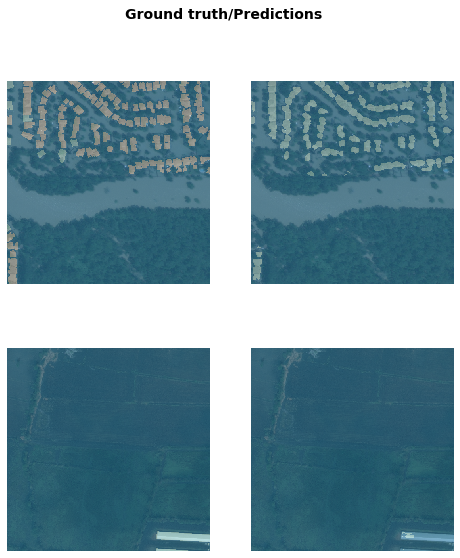

In [0]:

learn.show_results(rows=2, figsize=(8,9))

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4)   #same idea, slow to fast
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.077841,0.073012,nan,08:58
1,0.081799,0.071598,nan,08:57
2,0.080790,0.070207,nan,08:57
3,0.066997,0.068314,nan,08:58
4,0.074503,0.066676,nan,08:57
5,0.069906,0.065198,nan,08:58
6,0.078878,0.066040,nan,08:58
7,0.074423,0.064661,nan,08:58
8,0.058497,0.064785,nan,08:58
9,0.063882,0.060521,nan,08:58


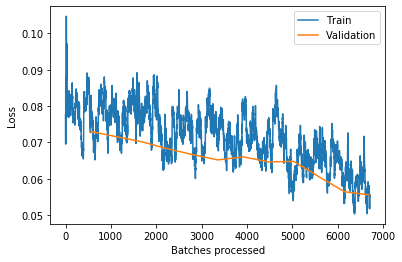

In [0]:
learn.save('stage-2', return_path=True);
!cp "/content/data/happy_sugar_life/images/models/stage-2.pth" "/content/drive/My Drive/Happy Sugar Life From Above/stage-sat-2.pth"
learn.recorder.plot_losses()

In [0]:
learn.destroy()
size = src_size 

In [0]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=3, have 15397MB of GPU RAM free


In [0]:
data = (src.transform(tfms, size=size, tfm_y=True)           #using transforms to resize
        .databunch(bs=bs)
        .normalize(imagenet_stats))


In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.load('stage-2');

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


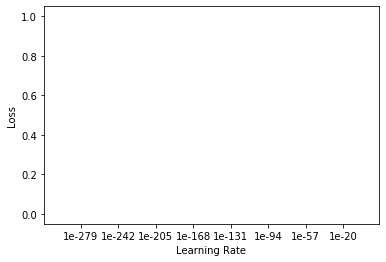

In [0]:
lr_find(learn, start_lr=1e-07, end_lr=10, num_it=100, stop_div=True)
learn.recorder.plot()

In [0]:
lr=(1e-5)/2

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.085661,0.078580,nan,35:40
1,0.093862,0.072724,nan,35:40
2,0.080230,0.069398,nan,35:40
3,0.094790,0.070365,nan,35:40
4,0.077571,0.067208,nan,35:40
5,0.065748,0.069297,nan,35:40
6,0.091131,0.066371,nan,35:40
7,0.080054,0.067074,nan,35:40
8,0.068629,0.066379,nan,35:40


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.save('stage-1-big',  return_path=True)

PosixPath('data/happy_sugar_life/images/models/stage-1-big.pth')

In [0]:
learn.load('stage-1-big');                                         
!cp "/content/data/happy_sugar_life/images/models/stage-1-big.pth" "/content/drive/My Drive/Happy Sugar Life From Above/stage-1-sun-big.pth"

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(1e-6,lr/10)

In [0]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.084015,0.066408,nan,36:54
1,0.091293,0.067577,nan,36:42
2,0.069163,0.064848,nan,36:42
3,0.070032,0.065747,nan,36:41
4,0.078600,0.063683,nan,36:41
5,0.079768,0.065697,nan,36:41
6,0.055910,0.065602,nan,36:41
7,0.060074,0.064165,nan,36:41
8,0.087886,0.064708,nan,36:41
9,0.090188,0.065587,nan,36:41


In [0]:
learn.save('stage-2-big')
!cp "/content/data/happy_sugar_life/images/models/stage-2-big.pth" "/content/drive/My Drive/Happy Sugar Life From Above/stage-2-big-sat.pth"

In [0]:
learn.load('stage-2-big');

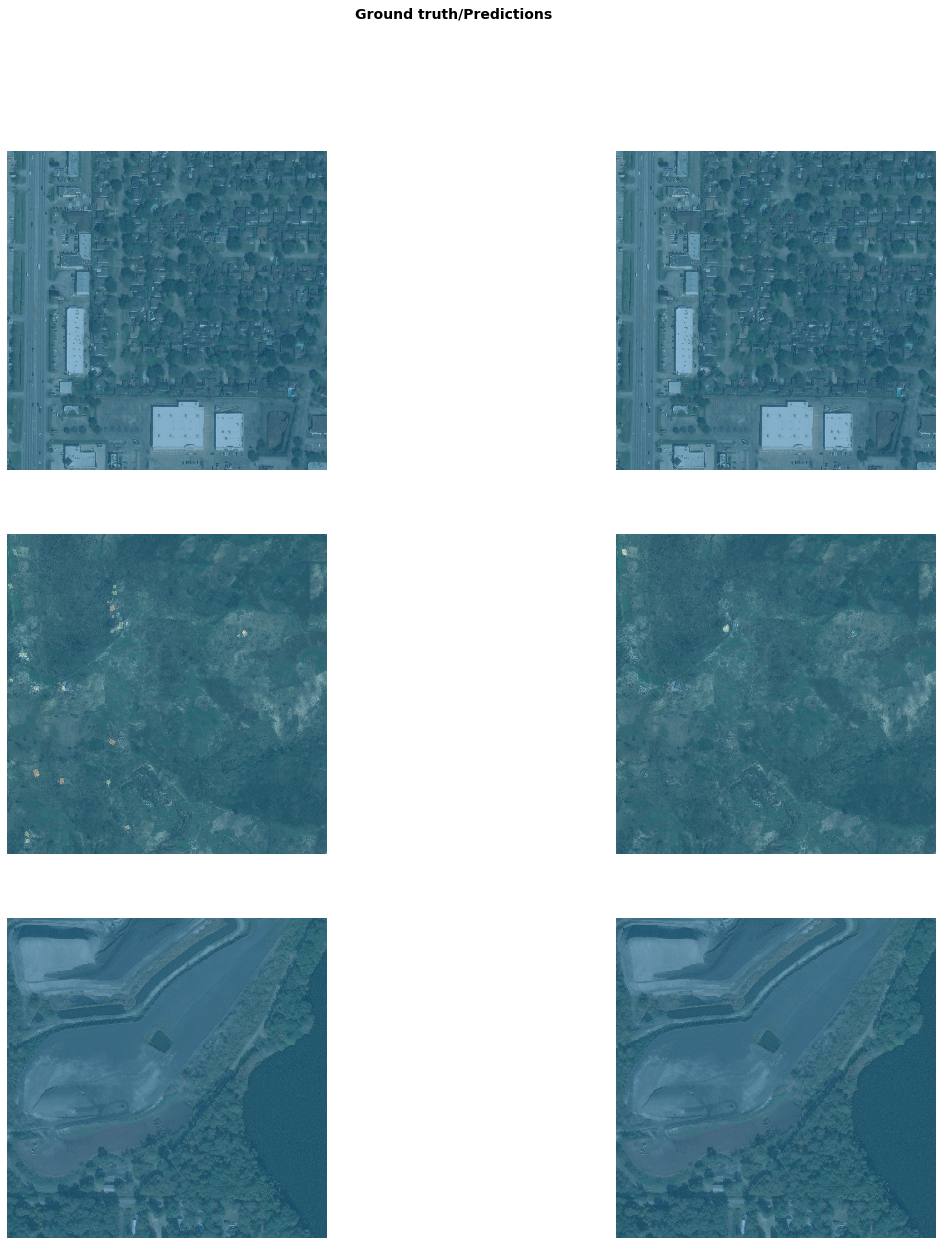

In [0]:
learn.show_results(rows=10, figsize=(20,20))

In [0]:
 learn.export()

In [0]:
!cp "/content/data/happy_sugar_life/images/export.pkl" "/content/drive/My Drive/Happy Sugar Life From Above/export_sun_checking.pkl"

In [0]:
img_f = data.valid_ds.x.items[0]
img_f

PosixPath('data/happy_sugar_life/images/hurricane-harvey_00000206_pre_disaster.png')

In [0]:
img_f = "/content/targets/a1.png"
mask = open_mask(get_y_fn(path/))
mask.show(figsize=(5,5), alpha=1)
img_f

PosixPath('data/happy_sugar_life/images/hurricane-michael_00000092_post_disaster.png')

In [0]:
fn = data.valid_ds.y.items[0]; fn 

PosixPath('data/happy_sugar_life/labels/hurricane-harvey_00000206_pre_disaster_masked_dmg.png')

In [0]:
len(learn.data.valid_ds)

NameError: ignored

In [0]:
id= 0
for x in range(len(learn.data.valid_ds)):
  img_id=str(id).zfill(5)
  

  imgi = learn.data.valid_ds[x][0]; 
  imgi.save(Path(f"/content/Test_it/TestingPlace/predictions/test_damage_{img_id}_prediction.png"))
  p,_,_ = learn.predict(learn.data.valid_ds.x[4])   #why do we have a 4 here
  p.save(Path(f"/content/Test_it/TestingPlace/predictions/test_localization_{img_id}_prediction.png"))

  imgi.save(Path(f"/content/Test_it/TestingPlace/targets/test_damage_{img_id}_target.png"))
  imgi = learn.data.valid_ds[x][1]; imgi.save(Path(f"/content/Test_it/TestingPlace/targets/test_localization_{img_id}_target.png"))    
  id+=1
print("Done")

Done


In [0]:
len(learn.data.valid_ds),len(get_files(Path("/content/predictions"))),len(get_files(Path("/content/targets")))

(1119, 2238, 2238)

In [0]:
# img = open_image(fn); img.shape
p,img_hr,b = learn.predict(learn.data.valid_ds.x[4])
show_image(learn.data.valid_ds.x[4], figsize=(8,7), interpolation='nearest');
type(p),type(img_hr),type(b)  
p.save(Path("/content/targets/a1.png"))

In [0]:
open_mask("/content/targets/a1.png")

In [0]:
imgr_hrI = imgr_hrI.numpy()

In [0]:
img_testing = open_image(Path('/content/content.png'))
this_img = pil2tensor(PIL.Image.open("/content/0001TP_006690_P.png").convert("I"), np.int32)

In [0]:
img_testing

In [0]:
from torchvision import transforms

In [0]:
img_hr.cpu().float

<function Tensor.float>

In [0]:
img_hr.type()

'torch.LongTensor'

In [0]:
  x = image2np(img_hr).astype(np.uint8)
  PIL.Image.fromarray(x).save("content.png")

In [0]:
x = image2np(img_hr).astype(np.uint8)
pt1 = PIL.Image.fromarray(x)

In [0]:
show_image(Path("/content/0001TP_006690_P.png"))

In [0]:
from torchvision.utils import save_image
import torch
import torchvision
rand_tensor= torch.rand(64, 3,28,28) 

img1 = rand_tensor[0]
img1.shape
img2 = img_hr.long()
save_image(imgr_hrI, 'img1.png')

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(num_it)

In [0]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img_pil = Image.fromarray(img)
img_pil.Image.getcolors(im)

In [0]:
from torchvision.utils import save_image as save_image_it
import torch
import torchvision

rand_tensor= torch.rand(64, 3,28,28) 

img1 = rand_tensor[0]
# img1 = img1.numpy() # TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>
save_image_it(img_hr, 'img_hr1.png')

In [0]:
img = open_image("/content/0001TP_006690_P.png")
img.shape

torch.Size([3, 720, 960])

In [0]:
mnist = untar_data(URLs.MNIST_TINY)

In [0]:
data2 = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))

In [0]:
print(img.numpy())

In [0]:
!git clone https://github.com/DIUx-xView/xview2-scoring.git

Cloning into 'xview2-scoring'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 6), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [0]:
!7z a myzip /content/TestingPlace/*

In [0]:
!cp "/content/myzip.7z" "/content/drive/My Drive/Happy Sugar Life From Above"

In [0]:
!pip install fire


     |████████████████████████████████| 81kB 2.4MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103528 sha256=f7641a750b7354701f846fc2ac1e136d3605043deb43cf580e61aa9ba5ef18d2
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire


In [0]:
!python /content/Test_it/xview2_metrics.py "/content/Test_it/TestingPlace/predictions" "/content/Test_it/TestingPlace/targets" "/content/Test_it/TestingPlace/output"

Calculating metrics using 4 cpus...
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/content/Test_it/xview2_metrics.py", line 96, in get_row_pair
    lp,dp,lt,dt = ph.load_images()
  File "/content/Test_it/xview2_metrics.py", line 58, in load_images
    return [self.load_and_validate_image(path) for path in self.paths]
  File "/content/Test_it/xview2_metrics.py", line 58, in <listcomp>
    return [self.load_and_validate_image(path) for path in self.paths]
  File "/content/Test_it/xview2_metrics.py", line 53, in load_and_validate_image
    assert set(np.unique(img)) <= {0,1,2,3,4}, f"values must ints 0-4, found {np.unique(img)}, path: {path}"
AssertionError: values must ints 0-4, found [ 34  35  36  37  38  39  40  41  42  43  44  45  46 

In [0]:
img2 = open_image(Path("/content/Test_it/TestingPlace/predictions/test_localization_00071_prediction.png"))

In [0]:
t1 = pil2tensor(PIL.Image.open("/content/Test_it/TestingPlace/predictions/test_localization_00071_prediction.png").convert("L"), np.float32)

In [0]:
t1.shape

torch.Size([1, 1024, 1024])

In [0]:
pl = learn.get_preds()

RuntimeError: ignored

In [0]:
len(pl)

NameError: ignored